<a href="https://colab.research.google.com/github/omkarjadhav-projects-700/Neural-Networks/blob/main/DL_Assign_1_Q_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### importing the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
### loading the dataset:
df = pd.read_csv("/Titanic_Data.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
### checking the cardinality of each feature:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
### remove the unnecessary columns with high cardinality and less relevancy:
df.drop(columns = ["Name", "Ticket", "Cabin"], inplace = True)

In [8]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
### checking for the missing values:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [10]:
## imputation of missing values using simpleimputer:

from sklearn.impute import SimpleImputer
# imputer for numerical feature - Age:
nimp = SimpleImputer(strategy = "mean")
df["Age"] = nimp.fit_transform(df[["Age"]])

In [11]:
# imputer for categorical features:
catimp = SimpleImputer(strategy = "most_frequent")
df["Embarked"] = catimp.fit_transform(df[["Embarked"]]).flatten()

In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


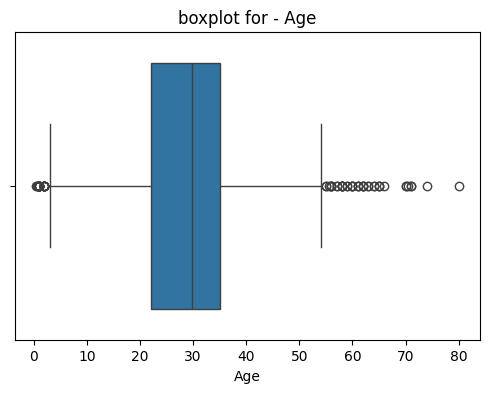

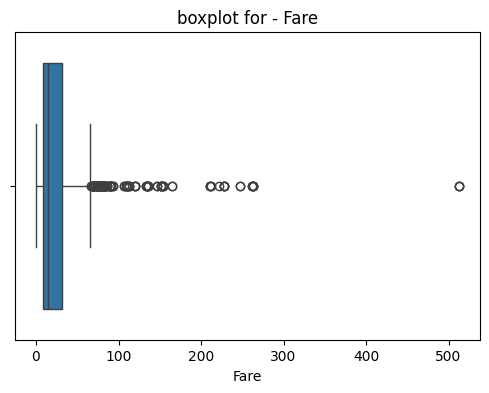

In [13]:
### detection of outliers:
## list of numerical features:
num_cols = ["Age", "Fare"]
## boxplot for detection of outliers:
for column in num_cols:
  plt.figure(figsize = (6,4))
  sns.boxplot(data = df, x = column)
  plt.title(f"boxplot for - {column}")
  plt.show()

In [14]:
### removal of outliers:
### quartiles:
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
## interquartile range:
IQR = Q3-Q1
## upper bound and lower bound:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
##removal of outliers:
df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [15]:
### feature scaling:

from sklearn.preprocessing import StandardScaler
### initializing the standardScaler:
scaler = StandardScaler()

In [16]:
### list of numerical features:
num = df.select_dtypes("number").columns
num

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

In [18]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730108,0,0.827377,male,-0.592481,0.432793,-0.473674,-0.502445,S
1,-1.726220,1,-1.566107,female,0.638789,0.432793,-0.473674,0.786845,C
2,-1.722332,1,0.827377,female,-0.284663,-0.474545,-0.473674,-0.488854,S
3,-1.718444,1,-1.566107,female,0.407926,0.432793,-0.473674,0.420730,S
4,-1.714556,0,0.827377,male,0.407926,-0.474545,-0.473674,-0.486337,S
...,...,...,...,...,...,...,...,...,...
886,1.714556,0,-0.369365,male,-0.207709,-0.474545,-0.473674,-0.386671,S
887,1.718444,1,-1.566107,female,-0.823344,-0.474545,-0.473674,-0.044381,S
888,1.722332,0,0.827377,female,0.000000,0.432793,2.008933,-0.176263,S
889,1.726220,1,-1.566107,male,-0.284663,-0.474545,-0.473674,-0.044381,C


In [19]:
### encoding of categorical features:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop = "first", sparse_output= False)

In [20]:
encoded1 = pd.get_dummies(data = df, columns = ["Sex", "Embarked"], drop_first = True, dtype = int)

In [21]:
encoded1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.730108,0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1,0,1
1,-1.726220,1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0,0,0
2,-1.722332,1,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1
3,-1.718444,1,-1.566107,0.407926,0.432793,-0.473674,0.420730,0,0,1
4,-1.714556,0,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,1.714556,0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,1,0,1
887,1.718444,1,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,0,0,1
888,1.722332,0,0.827377,0.000000,0.432793,2.008933,-0.176263,0,0,1
889,1.726220,1,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,1,0,0


In [22]:
df = encoded1

In [23]:
### remove the unnecessary column - passengerId:
df.drop(columns = ["PassengerId"], inplace = True)

In [24]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1,0,1
1,1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0,0,0
2,1,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1
3,1,-1.566107,0.407926,0.432793,-0.473674,0.420730,0,0,1
4,0,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,1,0,1
887,1,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,0,0,1
888,0,0.827377,0.000000,0.432793,2.008933,-0.176263,0,0,1
889,1,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,1,0,0


In [25]:
### train-test split:

from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(columns = ["Survived"])
y = df["Survived"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [29]:
### initiating the ANN:

In [30]:
import tensorflow
import keras
from keras.layers import Dropout, Dense, ReLU, Input
from keras.models import Sequential

In [31]:
model = Sequential()
## input layer:
model.add(Input(shape = (X_train.shape[1],)))
## 1st hidden layer:
model.add(Dense(units = 10, activation = "relu"))
## 2nd hidden layer:
model.add(Dense(units = 10, activation = "relu"))
## output layer:
model.add(Dense(units = 1, activation = "sigmoid"))

In [32]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [33]:
## early stopping:
from keras.callbacks import EarlyStopping
stopping = EarlyStopping(monitor = "val_loss", patience = 5, min_delta = 0.01)

In [34]:
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = stopping)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4575 - loss: 0.8062 - val_accuracy: 0.5028 - val_loss: 0.7603
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5357 - loss: 0.7238 - val_accuracy: 0.5866 - val_loss: 0.7064
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6132 - loss: 0.6831 - val_accuracy: 0.6257 - val_loss: 0.6712
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6368 - loss: 0.6516 - val_accuracy: 0.6369 - val_loss: 0.6475
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6417 - loss: 0.6235 - val_accuracy: 0.6257 - val_loss: 0.6284
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6748 - loss: 0.6020 - val_accuracy: 0.6201 - val_loss: 0.6127
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6657 - loss: 0.5996 - val_accuracy: 0.6257 - val_loss: 0.5988
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6780 - loss: 0.5990 - val_accuracy: 0.6425 -

In [35]:
### calculation of predicted values:

y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.14375937],
       [0.13756377],
       [0.13430978],
       [0.76412517],
       [0.5043119 ],
       [0.9450643 ],
       [0.73444337],
       [0.10735121],
       [0.7367767 ],
       [0.7929748 ],
       [0.24395108],
       [0.08243972],
       [0.2275014 ],
       [0.13938327],
       [0.13899972],
       [0.8518049 ],
       [0.21999416],
       [0.73448503],
       [0.14654212],
       [0.37449598],
       [0.1160765 ],
       [0.29771715],
       [0.3910335 ],
       [0.13782011],
       [0.12102944],
       [0.190923  ],
       [0.29604843],
       [0.14124177],
       [0.24486831],
       [0.5364735 ],
       [0.14229263],
       [0.5886938 ],
       [0.3042958 ],
       [0.5327303 ],
       [0.15125488],
       [0.1167361 ],
       [0.34886977],
       [0.73444337],
       [0.88649964],
       [0.10908584],
       [0.35274515],
       [0.06751192],
       [0.1093525 ],
       [0.1041473 ],
       [0.4120375 ],
       [0.33133924],
       [0.14303014],
       [0.119

In [38]:
y_pred = (y_pred > 0.5)

In [39]:
### model evaluation metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
### confusion matrix:
confusion_matrix(y_test, y_pred)

array([[94, 11],
       [22, 52]])

In [41]:
### accuracy score:
accuracy_score(y_test, y_pred)

0.8156424581005587

In [43]:
### classification report:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635 (2.48 KB)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 424 (1.66 KB)